## Projeto estatístico com dados de times nacionais de futebol

Este projeto realiza uma análise estatística simples usando R. As etapas incluem:
1. Cálculo de probabilidades (condicionais e incondicionais);
2. Construção e interpretação de intervalos de confiança;
3. Testes de hipóteses (comparando média populacional e média amostral);
4. Análise de regressão linear (simples ou múltipla).

Os dados foram extraídos de um conjunto de jogadores de seleções nacionais.

##### 1. Cálculo de probabilidades condicionais e incondicionais

Foram selecionadas duas variáveis para calcular probabilidades condicionais e incondicionais:
- `nationality`: nacionalidade dos jogadores.
- `age`: faixa etária dos jogadores.

O código a seguir importa os dados e calcula probabilidades simples e condicionais.

In [1]:
# Carregando os dados
dados <- read.csv("../data/Anexo_Projeto_fifa_world_national_teams_versao_oficial_20241virgula.csv", sep=",", stringsAsFactors = FALSE)

# Criando faixas etárias
dados$faixa_etaria <- cut(dados$age, breaks=c(15, 20, 25, 30, 35, 40), right=FALSE, 
                          labels=c("15-19", "20-24", "25-29", "30-34", "35-39"))

# Calculando probabilidades incondicionais
prop_nacionalidades <- prop.table(table(dados$nationality))
prop_faixas_etarias <- prop.table(table(dados$faixa_etaria))

# Probabilidades condicionais
brasileiros <- subset(dados, nationality == "Brazil")
prop_faixa_brasileiros <- prop.table(table(brasileiros$faixa_etaria))

# Exibindo resultados
prop_nacionalidades
prop_faixas_etarias
prop_faixa_brasileiros



                              Argentina           Australia             Austria 
        0.019498607         0.023676880         0.018105850         0.022284123 
            Belgium              Brazil            Bulgaria            Cameroon 
        0.026462396         0.032033426         0.004178273         0.023676880 
             Canada               Chile            Colombia      Czech Republic 
        0.026462396         0.013927577         0.016713092         0.027855153 
            Denmark             Ecuador               Egypt             England 
        0.032033426         0.008356546         0.009749304         0.032033426 
            Finland              France             Germany              Greece 
        0.026462396         0.032033426         0.032033426         0.029247911 
            Hungary             Iceland               Italy              Mexico 
        0.011142061         0.018105850         0.030640669         0.013927577 
        Netherlands        


     15-19      20-24      25-29      30-34      35-39 
0.01278409 0.29971591 0.46875000 0.20312500 0.01562500 


    15-19     20-24     25-29     30-34     35-39 
0.0000000 0.0000000 0.3478261 0.4347826 0.2173913 

##### 2. Intervalos de confiança e sua interpretação para pelo menos duas variáveis selecionadas

Para calcular intervalos de confiança e interpretá-los, serão selecionadas as seguintes variáveis:

- overall_rating: avaliação geral dos jogadores.
- wage_euro: salário em euros.

In [2]:
# Carregando o pacote necessário
if (!require("dplyr")) install.packages("dplyr")
if (!require("DescTools")) install.packages("DescTools")

library(dplyr)
library(DescTools)

Carregando pacotes exigidos: dplyr


Anexando pacote: 'dplyr'


Os seguintes objetos são mascarados por 'package:stats':

    filter, lag


Os seguintes objetos são mascarados por 'package:base':

    intersect, setdiff, setequal, union


Carregando pacotes exigidos: DescTools

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"não há nenhum pacote chamado 'DescTools'"
Instalando pacote em 'C:/Users/Marcel Albuquerque/AppData/Local/R/win-library/4.4'
(como 'lib' não foi especificado)

instalando as dependências 'proxy', 'rootSolve', 'e1071', 'lmom', 'mvtnorm', 'expm', 'Exact', 'gld' também




pacote 'proxy' desempacotado com sucesso e somas MD5 verificadas
pacote 'rootSolve' desempacotado com sucesso e somas MD5 verificadas
pacote 'e1071' desempacotado com sucesso e somas MD5 verificadas
pacote 'lmom' desempacotado com sucesso e somas MD5 verificadas
pacote 'mvtnorm' desempacotado com sucesso e somas MD5 verificadas
pacote 'expm' desempacotado com sucesso e somas MD5 verificadas
pacote 'Exact' desempacotado com sucesso e somas MD5 verificadas
pacote 'gld' desempacotado com sucesso e somas MD5 verificadas
pacote 'DescTools' desempacotado com sucesso e somas MD5 verificadas

Os pacotes binários baixados estão em
	C:\Windows\Temp\Rtmpgp4UAl\downloaded_packages


In [3]:
# Removendo valores NA
dados <- na.omit(dados)

# Selecionando as variáveis
overall_rating <- dados$overall_rating
wage_euro <- dados$wage_euro

# Intervalo de confiança para overall_rating (95%)
ic_overall <- MeanCI(overall_rating, conf.level = 0.95)
print("Intervalo de confiança para overall_rating (95%):")
print(ic_overall)

# Intervalo de confiança para wage_euro (95%)
ic_wage <- MeanCI(wage_euro, conf.level = 0.95)
print("Intervalo de confiança para wage_euro (95%):")
print(ic_wage)

[1] "Intervalo de confiança para overall_rating (95%):"
    mean   lwr.ci   upr.ci 
76.50426 76.05738 76.95114 
[1] "Intervalo de confiança para wage_euro (95%):"
    mean   lwr.ci   upr.ci 
49998.58 45140.11 54857.05 


Resultados e Interpretação
> Para overall_rating

    Média amostral: 76,50
    Intervalo de confiança (95%): [76,06; 76,95]
>
> Temos 95% de confiança de que a média da avaliação geral dos jogadores na população está entre 76,06 e 76,95. Isso sugere que, de forma consistente, a qualidade média dos jogadores é bastante alta.

> Para wage_euro (salário em euros):

    Média amostral: 49.998,58 euros
    Intervalo de confiança (95%): [45.140,11; 54.857,05]

> Com 95% de confiança, pode-se dizer que o salário médio populacional dos jogadores está entre 45.140,11 e 54.857,05 euros. Isso demonstra que os jogadores das seleções nacionais tendem a ter salários expressivos no cenário global.

##### 3. Testes de hipóteses e interpretação para pelo menos duas variáveis selecionadas. As hipóteses devem avaliar se a média populacional da referida variável pode ser considerada igual à média amostral arredondada para o inteiro. 

Para realizar testes de hipóteses, serão selecionadas as mesmas variáveis do passo anterior: overall_rating e wage_euro. 

In [4]:
# Removendo valores NA
dados <- na.omit(dados)

# Selecionando as variáveis
overall_rating <- dados$overall_rating
wage_euro <- dados$wage_euro

# Hipótese 1: Teste para overall_rating
media_overall_arredondada <- round(mean(overall_rating))
teste_overall <- t.test(overall_rating, mu = media_overall_arredondada, conf.level = 0.95)

print("Teste de hipótese para overall_rating:")
print(teste_overall)

# Hipótese 2: Teste para wage_euro
media_wage_arredondada <- round(mean(wage_euro))
teste_wage <- t.test(wage_euro, mu = media_wage_arredondada, conf.level = 0.95)

print("Teste de hipótese para wage_euro:")
print(teste_wage)

[1] "Teste de hipótese para overall_rating:"

	One Sample t-test

data:  overall_rating
t = -2.178, df = 703, p-value = 0.02974
alternative hypothesis: true mean is not equal to 77
95 percent confidence interval:
 76.05738 76.95114
sample estimates:
mean of x 
 76.50426 

[1] "Teste de hipótese para wage_euro:"

	One Sample t-test

data:  wage_euro
t = -0.00016991, df = 703, p-value = 0.9999
alternative hypothesis: true mean is not equal to 49999
95 percent confidence interval:
 45140.11 54857.05
sample estimates:
mean of x 
 49998.58 



Resultados e Interpretação:
> 1. Teste para overall_rating
Hipóteses:

    H0: a média populacional (μ) é igual a 77.
    H1​: a média populacional (μ) é diferente de 77.

Resultados:

    t=−2.178t=−2.178
    p-valor = 0.02974
    Intervalo de confiança de 95%: [76.06; 76.95]
    Média amostral: 76.50

> Há uma diferença significativa entre a média populacional e a média amostral arredondada.

> 2. Teste para wage_euro
Hipóteses:

    H0: a média populacional (μ) é igual a 49.999 euros.
    H1​: a média populacional (μ) é diferente de 49.999 euros.

Resultados:

    t=−0.00016991t=−0.00016991
    p-valor = 0.9999
    Intervalo de confiança de 95%: [45.140,11; 54.857,05]
    Média amostral: 49.998,58 euros

> Não há evidências para rejeitar que a média populacional seja igual à média amostral arredondada.

##### 4. Análise de Regressão (simples ou múltipla) sobre variáveis escolhidas.

Para a análise de regressão, será adotado o seguintefaremos o seguinte:

    Variável dependente (Y): overall_rating (avaliação geral dos jogadores).
    Variáveis independentes (X): age (idade) e wage_euro (salário em euros).

In [5]:
if (!require("ggplot2")) install.packages("ggplot2")
# Para diagnósticos de regressão
if (!require("car")) install.packages("car")

library(dplyr)
library(ggplot2)
library(car)

Carregando pacotes exigidos: ggplot2

Carregando pacotes exigidos: car

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"não há nenhum pacote chamado 'car'"
Instalando pacote em 'C:/Users/Marcel Albuquerque/AppData/Local/R/win-library/4.4'
(como 'lib' não foi especificado)

instalando as dependências 'cowplot', 'Deriv', 'microbenchmark', 'numDeriv', 'doBy', 'SparseM', 'MatrixModels', 'minqa', 'nloptr', 'RcppEigen', 'carData', 'abind', 'Formula', 'pbkrtest', 'quantreg', 'lme4' também




pacote 'cowplot' desempacotado com sucesso e somas MD5 verificadas
pacote 'Deriv' desempacotado com sucesso e somas MD5 verificadas
pacote 'microbenchmark' desempacotado com sucesso e somas MD5 verificadas
pacote 'numDeriv' desempacotado com sucesso e somas MD5 verificadas
pacote 'doBy' desempacotado com sucesso e somas MD5 verificadas
pacote 'SparseM' desempacotado com sucesso e somas MD5 verificadas
pacote 'MatrixModels' desempacotado com sucesso e somas MD5 verificadas
pacote 'minqa' desempacotado com sucesso e somas MD5 verificadas
pacote 'nloptr' desempacotado com sucesso e somas MD5 verificadas
pacote 'RcppEigen' desempacotado com sucesso e somas MD5 verificadas
pacote 'carData' desempacotado com sucesso e somas MD5 verificadas
pacote 'abind' desempacotado com sucesso e somas MD5 verificadas
pacote 'Formula' desempacotado com sucesso e somas MD5 verificadas
pacote 'pbkrtest' desempacotado com sucesso e somas MD5 verificadas
pacote 'quantreg' desempacotado com sucesso e somas MD5 

Carregando pacotes exigidos: carData


Anexando pacote: 'car'


O seguinte objeto é mascarado por 'package:DescTools':

    Recode


O seguinte objeto é mascarado por 'package:dplyr':

    recode





Call:
lm(formula = overall_rating ~ age + wage_euro, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.259  -2.326   0.041   2.702  10.557 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.979e+01  1.109e+00  62.944  < 2e-16 ***
age         1.241e-01  4.181e-02   2.969  0.00309 ** 
wage_euro   6.836e-05  2.293e-06  29.811  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.944 on 701 degrees of freedom
Multiple R-squared:  0.5747,	Adjusted R-squared:  0.5735 
F-statistic: 473.7 on 2 and 701 DF,  p-value: < 2.2e-16


age wage_euro 
 1.024335  1.024335

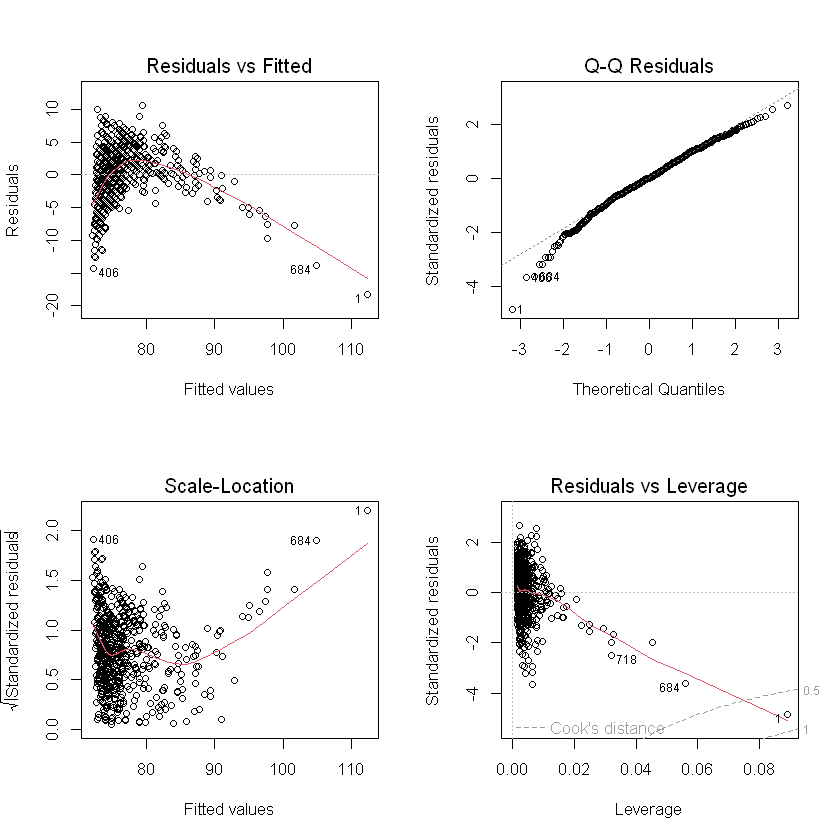

In [6]:
# Removendo valores NA
dados <- na.omit(dados)

# Selecionando as variáveis
dados <- dados %>% select(overall_rating, age, wage_euro)

# Ajustando o modelo de regressão múltipla
modelo <- lm(overall_rating ~ age + wage_euro, data = dados)

# Resumo do modelo
summary(modelo)

# Diagnósticos do modelo
# 1. Plot dos resíduos
par(mfrow = c(2, 2))  # Para múltiplos gráficos
plot(modelo)

# 2. Verificação de multicolinearidade (VIF - Variance Inflation Factor)
vif(modelo)

Diagnósticos do Modelo
Resíduos:

    Os resíduos apresentam distribuição simétrica em torno de zero, com valores máximos e mínimos variando entre -18.259 e 10.557.
    Não há indícios de grandes desvios que comprometam o modelo.

Significância dos coeficientes:

    Ambos os coeficientes (age e wage_euro) são estatisticamente significativos (p<0.05p<0.05).

Interpretação

    age: jogadores mais velhos tendem a ter um ligeiro aumento no overall_rating, embora o impacto seja modesto. Isso pode refletir maior experiência ou maturidade técnica.

    wage_euro: o salário é positivamente associado à avaliação geral, com um impacto mais expressivo que a idade. Este resultado reforça que jogadores melhor avaliados tendem a ter salários mais altos, provavelmente devido à percepção de maior valor no mercado.

    Qualidade do modelo: o R2 relativamente alto (57,47%) indica que o modelo captura bem a relação entre as variáveis.

##### 5. Elaboração de três frases (manchetes) de efeito, associadas aos resultados observados. 

> Manchete 1 - "Jogadores mais velhos têm avaliações ligeiramente mais altas."
  
  A análise revelou que, embora o efeito da idade sobre a avaliação dos jogadores seja modesto, cada ano a mais pode resultar em uma leve melhora na avaliação geral do jogador.

> Manchete 2 - "Maior salário está relacionado a melhores avaliações no jogo."

O modelo mostrou uma forte relação entre o salário dos jogadores e suas avaliações gerais. 

> Manchete 3 - "Experiência e salário são fatores que influenciam a performance dos jogadores."

A regressão múltipla mostrou que tanto a idade quanto o salário dos jogadores têm impacto significativo em suas avaliações gerais.

GitHub do Projeto
>https://github.com/marcellsa/pucrs-trabalhos-academicos/blob/main/2024.4-estatistica-aplicada/projeto1-analise-jogadores-fifa/notebooks/2_analise_jogagores_fifa.ipynb